In [1]:
import numpy as np
from lsst.sims.almanac import Almanac
import matplotlib.pylab as plt
import pandas as pd
import sqlite3
from utils import Constellation, starlink_constellation
import sys

import healpy as hp
%matplotlib inline
from lsst.sims.utils import _raDec2Hpid, hpid2RaDec

In [2]:
def aroundtwi(supersize=False, time=10.):
    sat_tles = starlink_constellation(supersize=supersize)
    nsats = len(sat_tles)
    constellation = Constellation(sat_tles)
    #mjd_start = 59859.375573254 # sunalt = -16.2903238482603 degrees
    mjd_start = 59863.0097259146 # sunlat = -18.3928422773296
    step=1./3600/24.
    length = time/60/24.
    #mjd_start += length
    mjds = np.arange(mjd_start, mjd_start+length+step, step)
    nside = 64
    result = np.zeros(hp.nside2npix(nside))
    hpids = np.arange(result.size)
    ra,dec = hpid2RaDec(nside, hpids)
    below = np.where(dec < 30.)
    result[below] = np.nan
    for mjd in mjds:
        constellation.update_mjd(mjd)
        above = constellation.above_alt_limit
        hpids = _raDec2Hpid(nside, constellation.azimuth_rad[above], constellation.altitudes_rad[above])
        result[hpids] += 1
    hp.mollview(result, rot=(0,90,0), title='%.1f minutes, %i sats, sunAlt=-18.4 degrees' % (length*60*24, nsats), unit='N hits')

    return result
    
# Note, this is just healpixels that get hit! Need to convolve with 3.5 deg FoV to make sure we don't have any hits.
#plt.savefig('post_twi_example.png')

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


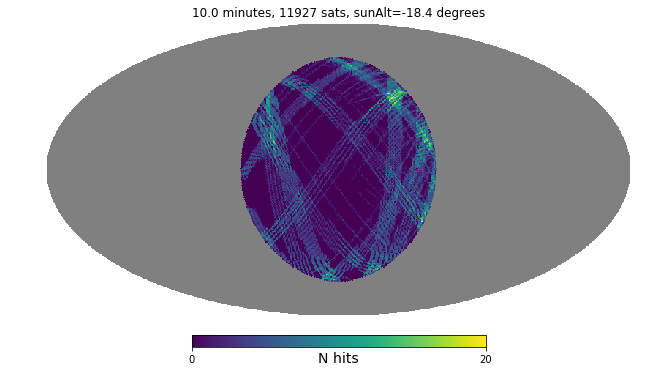

In [3]:
regular = aroundtwi()

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


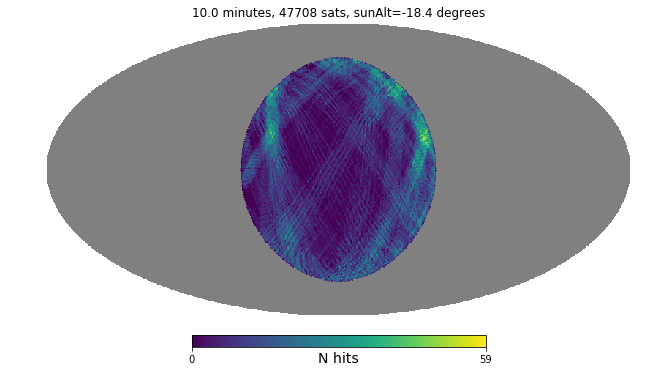

In [4]:
supers = aroundtwi(supersize=True)

/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


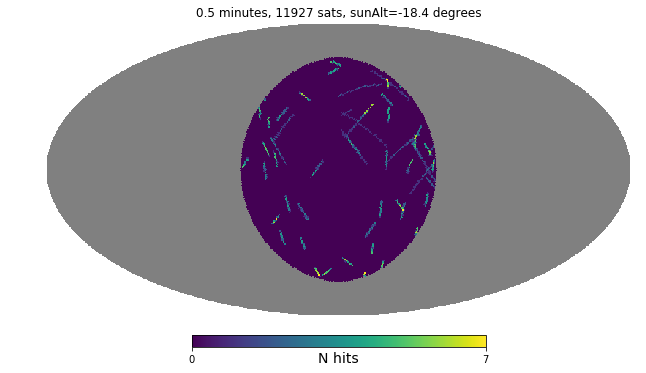

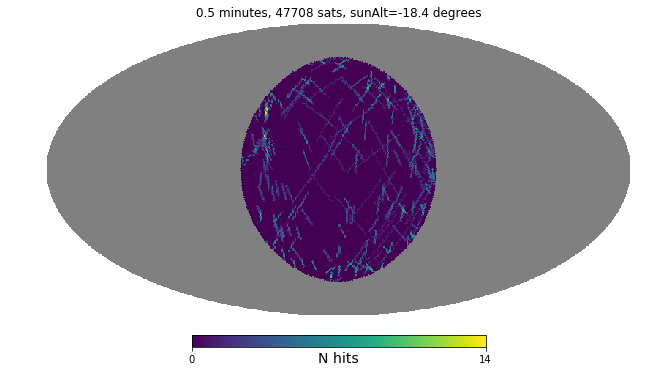

In [5]:
regular = aroundtwi(time=0.5)
supers = aroundtwi(supersize=True, time=0.5)

Sigma is 89.178789 arcmin (0.025941 rad) 
-> fwhm is 210.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


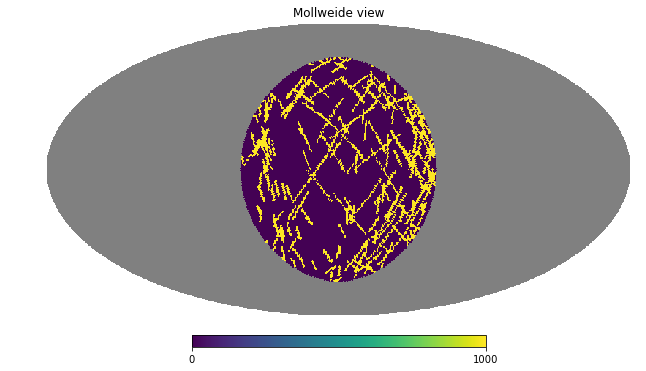

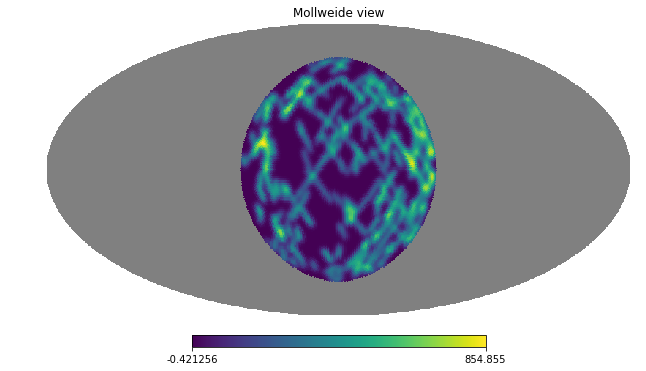

In [6]:
ack = supers.copy()
ack[np.isnan(ack)] = hp.UNSEEN
ack[np.where(ack > 0)] = 1000
smoothed = hp.sphtfunc.smoothing(ack, fwhm=np.radians(3.5))
#smoothed[np.where(smoothed < 0.25)] = 0
hp.mollview(ack, rot=(0,90,0))
hp.mollview(smoothed, rot=(0,90,0))

In [8]:
nside=64
# angles of pixels that got hit
theta, phi = hp.pix2ang(nside=nside, ipix=np.where(supers > 0)[0])

# convert to vector
vec = hp.ang2vec(theta, phi)

ipix_disc = [hp.query_disc(nside=nside, vec=vector, radius=np.radians(3.5)) for vector in vec]

/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1049: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
/Users/yoachim/lsstp3/stack/miniconda3-4.3.21-10a4fa6/DarwinX86/healpy/1.10.3.lsst1+6/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/projaxes.py:1050: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


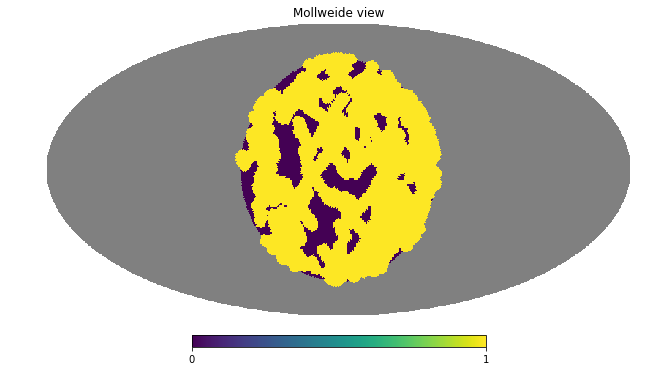

In [9]:
supers_grow = supers+0
supers_grow[np.unique(np.concatenate(ipix_disc))] = 1
hp.mollview(supers_grow, rot=(0,90))

In [10]:
possible = np.size(np.where(supers_grow >=0)[0])
unmasked = np.size(np.where(supers_grow ==0)[0])
print('fraction of sky available =', unmasked/possible)

fraction of sky available = 0.17307987122489651


/Users/yoachim/lsstp3/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
